In [1]:
import pandas as pd
import numpy as np
# Split arrays or matrices into train and test subsets.
from sklearn.model_selection import train_test_split

# Mean absolute error regression loss.
from sklearn.metrics import mean_absolute_error

# Apply a power transform featurewise to make data more Gaussian-like.
from sklearn.preprocessing import PowerTransformer

# A Sequential model is appropriate for a plain stack of layers where each 
# layer has exactly one input tensor and one output tensor.
from keras import Sequential

# Dense - regular densely-connected NN layer.
# Applies Dropout to the input.
from keras.layers import Dense, Dropout

# matplotlib.pyplot is a collection of functions that
# make matplotlib work like MATLAB.
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


 **1. Загрузить данные из файла dataset.csv в pandas-датафрейм**

In [3]:
data = pd.read_csv('dataset.csv', sep = ",")

In [4]:
data.head()

,position,intention,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [5]:
data.tail()

,position,intention,success
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0
296,21.215594,48.265520,1.0


In [6]:
data.describe()


,position,intention,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


In [7]:
df = data.copy()
df.head()

,position,intention,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


**2. Первые 2 столбца датафрейма (position и intention) принять в качестве 
входного вектора, третий столбец – в качестве целевых значений (можно 
воспользоваться методом drop и общими подходами к индексированию и 
выбору данных из датафрейма)**

In [8]:
df = df.drop(columns=['success'])


In [9]:
df.head()

,position,intention
0,23.657801,18.859917
1,22.573729,17.969223
2,32.553424,29.463651
3,6.718035,25.704665
4,14.401919,16.770856


**3. Используя функцию train_test_split**


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, y = df.values[:, :-1], df.values[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))
print(X_train[:3])
print(y_train[:3])


[[13.97292218]
 [20.11395923]
 [35.16135413]]
[[37.71869001]
 [28.02183977]
 [33.16395078]]


**4. Используя StandardScaler**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler2 = StandardScaler()
scaler2.fit(y_train)
y_train= scaler2.transform(y_train)
y_test = scaler2.transform(y_test)

# Determine the number of input features
n_features = X.shape[1]

print(X_train[:3])
print(y_train[:3])
print(n_features)

[[-1.12655219]
 [-0.34566395]
 [ 1.56774803]]
[[-0.43256792]
 [-0.90979952]
 [-0.65672993]]
1


**5. Построить модель с такой же архитектурой и 6 Откомпилировать модель 7. Обучить модель классификатора**

In [14]:
from keras import Sequential

# Dense - regular densely-connected NN layer.
# Applies Dropout to the input.
from keras.layers import Dense, Dropout

# matplotlib.pyplot is a collection of functions that
# make matplotlib work like MATLAB.
from matplotlib import pyplot as plt
# Define model
model = Sequential()
model.add(Dense(2,
                activation='softmax',
                kernel_initializer='he_normal',
                input_shape=(n_features,)))
model.add(Dense(2,
                activation='softmax',
                kernel_initializer='he_normal')) # the way to set the initial
                                                 # random weights of Keras layers.
                                                 # He normal initializer.
                                                 # It draws samples from a truncated
                                                 # normal distribution.
model.add(Dropout(0.05))
model.add(Dense(6, activation='softmax'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy')
# Fit the model
history = model.fit(X_train, y_train,
                    epochs=120,
                    batch_size=8,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/120
8/8 - 1s - loss: -1.2043e-15 - val_loss: 3.5033e-09 - 1s/epoch - 128ms/step
Epoch 2/120
8/8 - 0s - loss: 0.0000e+00 - val_loss: 3.5033e-09 - 64ms/epoch - 8ms/step
Epoch 3/120
8/8 - 0s - loss: -6.0215e-16 - val_loss: 3.5033e-09 - 102ms/epoch - 13ms/step
Epoch 4/120
8/8 - 0s - loss: -9.6345e-16 - val_loss: 3.5033e-09 - 96ms/epoch - 12ms/step
Epoch 5/120
8/8 - 0s - loss: 1.0839e-15 - val_loss: 3.5033e-09 - 66ms/epoch - 8ms/step
Epoch 6/120
8/8 - 0s - loss: -1.5656e-15 - val_loss: 3.5033e-09 - 106ms/epoch - 13ms/step
Epoch 7/120
8/8 - 0s - loss: -4.8172e-16 - val_loss: 3.5033e-09 - 73ms/epoch - 9ms/step
Epoch 8/120
8/8 - 0s - loss: -7.2259e-16 - val_loss: 3.5033e-09 - 68ms/epoch - 9ms/step
Epoch 9/120
8/8 - 0s - loss: 2.1678e-15 - val_loss: 3.5033e-09 - 65ms/epoch - 8ms/step
Epoch 10/120
8/8 - 0s - loss: -1.2043e-15 - val_loss: 3.5033e-09 - 109ms/epoch - 14ms/step
Epoch 11/120
8/8 - 0s - loss: -9.6345e-16 - val_loss: 3.5033e-09 - 95ms/epoch - 12ms/step
Epoch 12/120
8/8 - 0s - l

**8. Продемонстрировать результаты обучения**

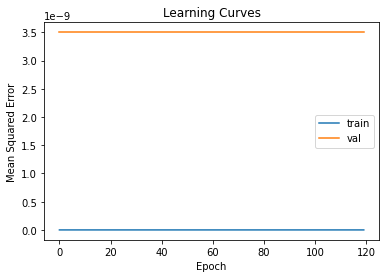

In [15]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [16]:
# Predict test set
y_pred = model.predict(X_test)
# Inverse transforms on target variable
y_test = scaler2.inverse_transform(y_test)
y_pred = scaler2.inverse_transform(y_pred)

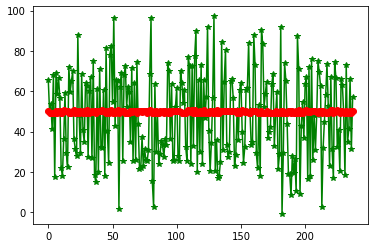

In [17]:
plt.plot(y_test, 'g*-', y_pred, 'ro-')
plt.show()

In [18]:
# evaluate predictions
score = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % score)

MAE: 19.822
